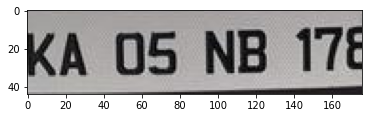

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\91639\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KA05NB17E


In [1]:
# Plate Number Detection

import numpy as np
import cv2
import matplotlib.pyplot as plt
import easyocr

plateCascade = cv2.CascadeClassifier('indian_plate.xml')

#detect the plate and return car + plate image
def detect_plate_no(img):
    plateImg = img.copy()
    roi = img.copy()
    plateRect = plateCascade.detectMultiScale(plateImg,scaleFactor = 1.5, minNeighbors = 7)
    for (x,y,w,h) in plateRect:
        roi_ = roi[y:y+h, x:x+w, :]
        platePart = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plateImg,(x+2,y),(x+w-3, y+h-5),(0,255,0),3)
    return plateImg, platePart

#normal function to display 
def display_plate_no(img):
    img_ = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_)
    plt.show()

#test image is used for detecting plate
inputImg = cv2.imread('car1.jpg')
inpImg, plate = detect_plate_no(inputImg)

display_plate_no(plate)

# Using Pre Created Model to Predict Text 

reader = easyocr.Reader(['en'])
result = reader.readtext(plate)

final_result = result[0][1]
n=""
f = final_result.split('-')
f = n.join(f)
f = f.replace(" ","")
plate_number = f.upper()

print(plate_number)